# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открытие файла с данными и изучение общей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
df.shape

(23699, 22)

In [3]:
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


 Получим общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датасет содержит следующие столбцы:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [5]:
#Изменим название столбца 'cityCenters_nearest':
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

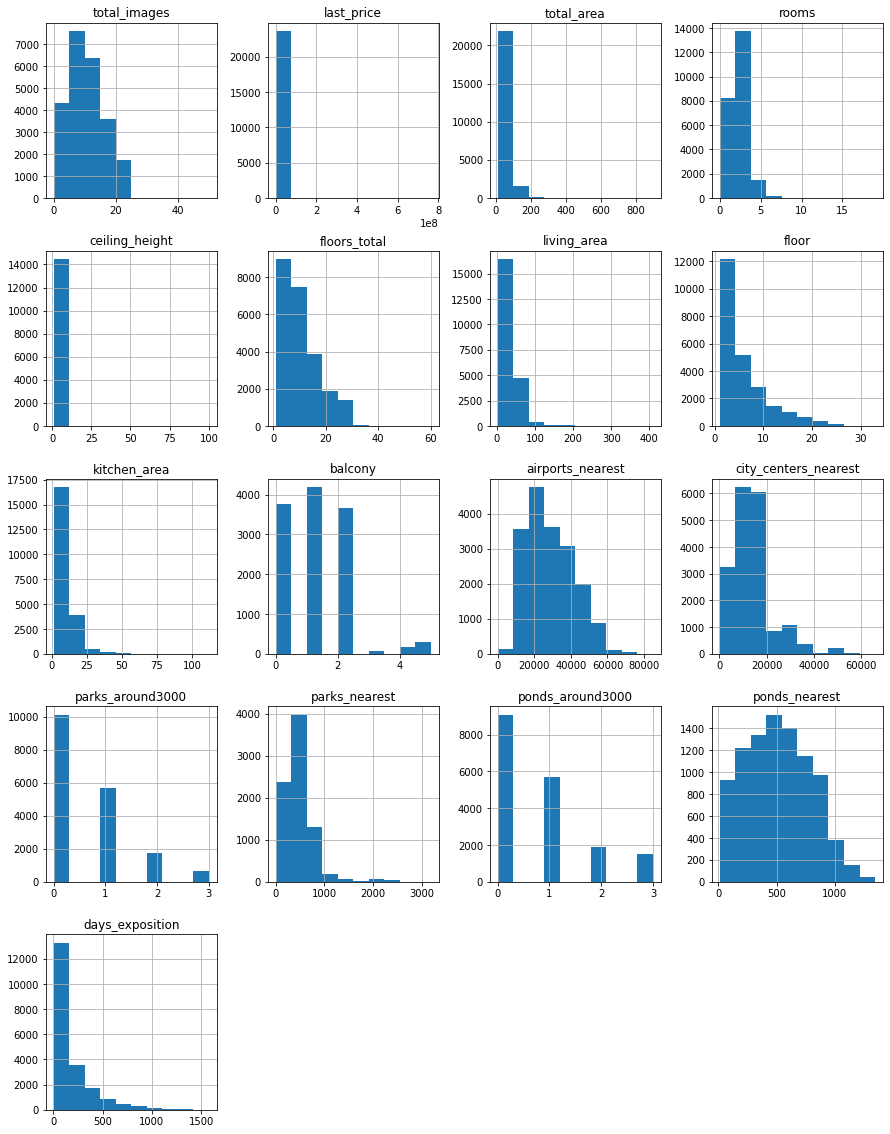

In [6]:
#Построим гистограммы:
df.hist(figsize=(15, 20))
plt.show()

**Посмотрим на количество пропущенных значений для каждого столбца.**

In [7]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


***Заполним пропущенные значения в тех столбцах, где это возможно.***

##### Столбец `balcony`

In [9]:
print('Количество NaN по balcony:', df['balcony'].isna().sum())

Количество NaN по balcony: 11519


Если продавцом не было указано число балконов, то, скорее всего, квартире их нет. Такие пропуски заменим на 0.

In [10]:
df['balcony'] = df['balcony'].fillna(0)

##### Столбец `is_apartment`

In [11]:
print('Количество NaN по is_apartment:', df['is_apartment'].isna().sum())

Количество NaN по is_apartment: 20924


Можно предположить, что пропуски в данном столбце остались просто незаполненными в силу того, что собственники жилых квартир не поставили отметку, о том, что квартира не является аппартаментами. Т.к. значения в данном столбце имеют булев тип - заменим на False.

In [12]:
df['is_apartment']=df['is_apartment'].fillna(False)

##### Столбец `kitchen_area`

In [13]:
print('Количество NaN по kitchen_area:', df['kitchen_area'].isna().sum())

Количество NaN по kitchen_area: 2278


Отсутствие значений в этом столбце может говорить о том, что в квартирах кухня не выделена в отдельную комнату, а например является частью гостинной, как например в квартирах со свободной планировкой или в квартирах-студиях. Заменим значения kitchen_area в столбцах studio и open_plan на 0:

In [14]:
df['kitchen_area'].where((df['kitchen_area'].isna()) & (df['studio']),0)
df['kitchen_area'].where((df['kitchen_area'].isna()) & (df['open_plan']),0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    0.0
23698    0.0
Name: kitchen_area, Length: 23699, dtype: float64

Оставшиеся значения в этом столбце мы заполним  медианными значениями. Найдем коэфициент средней доли кухни в общей площади квартиры.

In [15]:
#Коэффициент доли площади кухни в общей площади квартиры (рассчитанный по медианным значениям):
k_median_kitchen_area = df['kitchen_area'].median() / df['total_area'].median()

In [16]:
df['kitchen_area'] = df['kitchen_area'].fillna(k_median_kitchen_area*df['total_area'])

In [17]:
#перепроверим результат
print('Количество NaN по kitchen_area:', df['kitchen_area'].isna().sum())

Количество NaN по kitchen_area: 0


##### Столбец `living_area`

In [18]:
print('Количество NaN по living_area:', df['living_area'].isna().sum())

Количество NaN по living_area: 1903


Часть объявлений содержит информацию об общей площади объекта, но отсутствуют деления на жилую/нежилую площадь. Так, к жилой площади относятся только те помещения, которые пригодны для проживания: гостиная, спальня, детская. Кухня не относится к жилой площади, но в общую площадь включается. Заполним отсутствующую информацию медианными значениями, через коэфициент, отражающий медианную долю жилой площади в общей площади квартиры.

In [19]:
#Коэффициент доли жилой площади в общей площади квартиры (рассчитанный по медианным значениям):
k_median_living_area = df['living_area'].median() / df['total_area'].median()

In [20]:
df['living_area'] = df['living_area'].fillna(k_median_living_area*df['total_area'])

In [21]:
#перепроверим результат
print('Количество NaN по living_area:', df['living_area'].isna().sum())

Количество NaN по living_area: 0


##### Столбец `ceiling_height`

In [22]:
#print('Количество NaN по ceiling_height:', df['ceiling_height'].isna().sum())

Заполним пропуски в этом столбце медианным значением по каждому типу из столбца floors_total.

In [23]:
#median_ceiling_height = df.groupby('floors_total')['ceiling_height'].transform('median') 
#print(df['ceiling_height'].fillna(median_ceiling_height, inplace=True)) 
#df.head()

##### Столбец `locality_name`

Есть предположение, что в столбце city_centers_nearest могут быть такие строки, которые совпадают со значением NaN в столбце locality_name и по которым можно сделать вывод, что квартира находится в пределах Санкт-Петербурга

In [24]:
#проверим сколько строк удовлетворяет нашему условию
print('Количество NaN по locality_name:', df['locality_name'].isna().sum())
df[(df['locality_name'].isna())][['locality_name', 'city_centers_nearest']].head()

Количество NaN по locality_name: 49


,locality_name,city_centers_nearest
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


Да, такие строки есть. В части строк, где не указан город, есть информация по расстоянию до центра. В данном случае можно сделать категоризацию по удаленности от центра. В части строк, где расстояние будет меньше 10 км заполним значением "Санкт-Петербург". В остальных строках оставим NaN.

In [25]:
#создадим функцию
def centers_nearest_category(row):
    if row['city_centers_nearest'] < 10000:
        return 'центр'
    elif row['city_centers_nearest'] < 17000:
        return 'в пределах города'
    elif row['city_centers_nearest'] >= 17000:
        return 'область'

In [26]:
#добавим столбец
df['centers_nearest_category'] = df.apply(centers_nearest_category, axis=1)

In [27]:
#проверим
df[['locality_name', 'city_centers_nearest', 'centers_nearest_category']].head(10)

,locality_name,city_centers_nearest,centers_nearest_category
0,Санкт-Петербург,16028.0,в пределах города
1,посёлок Шушары,18603.0,область
2,Санкт-Петербург,13933.0,в пределах города
3,Санкт-Петербург,6800.0,центр
4,Санкт-Петербург,8098.0,центр
5,городской посёлок Янино-1,NaN,None
6,посёлок Парголово,19143.0,область
7,Санкт-Петербург,11634.0,в пределах города
8,посёлок Мурино,NaN,None
9,Санкт-Петербург,15008.0,в пределах города


In [28]:
#произведем замену
df.loc[(df['locality_name'].isna()) & (df['city_centers_nearest'] < 10000), 'locality_name'] = \
df.loc[(df['locality_name'].isna()) & (df['city_centers_nearest'] < 10000), 'locality_name'].fillna('Санкт-Петербург')

In [29]:
#посмотрим на сколько уменьшилось количество пропусков
print('Количество NaN по locality_name:', df['locality_name'].isna().sum())
df[(df['locality_name'].isna())][['locality_name', 'city_centers_nearest']].head()

Количество NaN по locality_name: 24


,locality_name,city_centers_nearest
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
5707,NaN,16788.0
6765,NaN,17369.0


25 пропусков из 49 заполнено.

##### Столбец `ceiling_height`

В силу особенностей архитектуры досоветского и раннесоветсткого периода города Санкт-Петербург, жилой фонд исторической (центральной) части города характеризуется преимущественно высокими потолками.
Поэтому заполнить пропуски в столбце ceiling_height можно средним значением по принципу: "чем дальше от центра, тем ниже потолки". Выше мы уже создавали функцию с категоризацией по удаленности от центра и добавляли новый столбец.

In [30]:
print('Количество NaN по ceiling_height:', df['ceiling_height'].isna().sum())

Количество NaN по ceiling_height: 9195


In [31]:
#посмотрим на среднее значение в зависимости от удаленности от центра
df.groupby('centers_nearest_category')['ceiling_height'].mean().sort_values(ascending=False).to_frame()

,ceiling_height
centers_nearest_category,
центр,3.064470
область,2.677288
в пределах города,2.672838


In [32]:
#произведем замену
median_ceiling_height = df.groupby('centers_nearest_category')['ceiling_height'].transform('mean') 
print(df['ceiling_height'].fillna(median_ceiling_height, inplace=True)) 
df.head()

None


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,centers_nearest_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.000000,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,в пределах города
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.677288,11.0,18.600000,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.672838,5.0,34.300000,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,в пределах города
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.064470,14.0,91.730769,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,центр
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.000000,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,центр


In [33]:
#посмотрим на количество пропусков после замены 
print('Количество NaN по ceiling_height:', df['ceiling_height'].isna().sum())

Количество NaN по ceiling_height: 2575


In [34]:
#оставшиеся пропуски заменим медианным значением по столбцу:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

In [35]:
#перепроверим
print('Количество NaN по ceiling_height:', df['ceiling_height'].isna().sum())

Количество NaN по ceiling_height: 0


***Удаление строк с пропущенными значениями***

Посмотрим сколько строк с пропусками в стобцах процентном соотношении. Удаление строк в количестве менее 5% не окажет существенного влияние на результат исследования.

In [36]:
for col in df.columns:
    percent_missing = np.mean(df[col].isna())
    print(f'{col} - {percent_missing*100}%')

total_images - 0.0%
last_price - 0.0%
total_area - 0.0%
first_day_exposition - 0.0%
rooms - 0.0%
ceiling_height - 0.0%
floors_total - 0.36288450989493226%
living_area - 0.0%
floor - 0.0%
is_apartment - 0.0%
studio - 0.0%
open_plan - 0.0%
kitchen_area - 0.0%
balcony - 0.0%
locality_name - 0.10127009578463227%
airports_nearest - 23.384952951601335%
city_centers_nearest - 23.28790244314106%
parks_around3000 - 23.2836828558167%
parks_nearest - 65.90995400649817%
ponds_around3000 - 23.2836828558167%
ponds_nearest - 61.55955947508333%
days_exposition - 13.422507278788135%
centers_nearest_category - 23.28790244314106%


##### Оставшиеся пропуски в столбце `locality_name`

Информация о местонахождении объекта недвижимости осталась пропущенной в 24 записях, что составляет всего 0.1% датасета.Такие записи можем удалить.

In [37]:
nan_locality_name = df[df['locality_name'].isna()]
nan_locality_name.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,centers_nearest_category
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.672838,4.0,42.6,2,False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,None
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.677288,24.0,15.6,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,область
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.677288,24.0,33.1,21,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,область
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,2.672838,24.0,20.0,23,False,...,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,в пределах города
6765,20,4895892.0,60.7,2015-03-12T00:00:00,2,2.677288,24.0,31.9,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0,область


In [38]:
bad_index=nan_locality_name.index
df.drop(bad_index, inplace=True)

In [39]:
print(df['locality_name'].value_counts())

Санкт-Петербург                   15746
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
поселок Семиозерье                    1
деревня Трубников Бор                 1
посёлок городского типа Рябово        1
поселок Ромашки                       1
поселок Пчевжа                        1
Name: locality_name, Length: 364, dtype: int64


In [40]:
#перепроверим
print('Количество NaN по locality_name:', df['locality_name'].isna().sum())

Количество NaN по locality_name: 0


##### Столбец `floors_total`

In [41]:
print('Количество NaN по floors_total:', df['floors_total'].isna().sum())

Количество NaN по floors_total: 85


Пропущенная информация об этажности объектов недвижимости составляет составляет 0,4%. Это небольшое количество, поэтому такие записи тоже можем удалить.

In [42]:
nan_floors_total = df[df['floors_total'].isna()]
nan_floors_total

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,centers_nearest_category
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.672838,NaN,30.800000,4,False,...,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,в пределах города
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.677288,NaN,20.750000,1,False,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,область
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,3.064470,NaN,38.400000,12,False,...,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,центр
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.677288,NaN,47.100000,8,False,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,область
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.672838,NaN,22.500000,9,False,...,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,в пределах города
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.800000,NaN,36.634615,3,False,...,0.0,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,в пределах города
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.677288,NaN,31.700000,20,False,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,область
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,3.064470,NaN,45.380000,6,False,...,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0,центр
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,3.064470,NaN,50.400000,18,False,...,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,центр


In [43]:
bad_index=nan_floors_total.index
df.drop(bad_index, inplace=True)

In [44]:
#перепроверим
print('Количество NaN по floors_total:', df['floors_total'].isna().sum())

Количество NaN по floors_total: 0


##### Столбцы `parks_around3000` и `ponds_around3000`

In [45]:
print('Количество NaN по parks_around3000:', df['parks_around3000'].isna().sum())
print('Количество NaN по ponds_around3000:', df['ponds_around3000'].isna().sum())

Количество NaN по parks_around3000: 5500
Количество NaN по ponds_around3000: 5500


Можно предположить, что отсутствующие значения в этих столбцах говорят о том, что парков и прудов рядом с жильем нет. Столбцы parks_around3000 и ponds_around3000 заполним значениями 0.

In [46]:
df['parks_around3000'] = df['parks_around3000'].fillna('0')
df['ponds_around3000'] = df['ponds_around3000'].fillna('0')

##### Столбец `days_exposition`

In [47]:
print('Количество NaN по days_exposition:', df['days_exposition'].isna().sum())

Количество NaN по days_exposition: 3171


Столбец days_exposition содержит информацию о количестве дней, в течении которых было размещено объявление (от публикации до снятия).

Пропущенный значения в этом столбце могут говорить о том, что объявление еще "действующее" и не снято с публикации. Удалить пропущенные значения в этом столбце мы не можем.

***Изменение типов данных в столбцах***

Следующие столбцы будут приведены в целочисленный тип(int):

- floors_total - заменим значение на целое число, т.к. в домах не может быть половина этажа; 
- balcony - количество балконов также должно быть целым;
- parks_around3000 и ponds_around3000 - укажем в целых числах;
- first_day_exposition - преобразуем строки в столбце в дату со временем;
- значения в airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest не могут быть изменены на int из-за значений NaN.

In [48]:
#еще раз взглянем на типы строк в столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23590 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_images              23590 non-null  int64  
 1   last_price                23590 non-null  float64
 2   total_area                23590 non-null  float64
 3   first_day_exposition      23590 non-null  object 
 4   rooms                     23590 non-null  int64  
 5   ceiling_height            23590 non-null  float64
 6   floors_total              23590 non-null  float64
 7   living_area               23590 non-null  float64
 8   floor                     23590 non-null  int64  
 9   is_apartment              23590 non-null  bool   
 10  studio                    23590 non-null  bool   
 11  open_plan                 23590 non-null  bool   
 12  kitchen_area              23590 non-null  float64
 13  balcony                   23590 non-null  float64
 14  locali

##### Столбец `balcony`

In [49]:
df['balcony']=df['balcony'].astype('int')

##### Столбец `floors_total`

In [50]:
df['floors_total']=df['floors_total'].astype('int')

##### Столбцы `parks_around3000` `ponds_around3000`

In [51]:
df['parks_around3000']=df['parks_around3000'].astype('int')
df['ponds_around3000']=df['ponds_around3000'].astype('int')

##### Cтолбец `first_day_exposition`

In [52]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [53]:
#итоговая проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23590 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23590 non-null  int64         
 1   last_price                23590 non-null  float64       
 2   total_area                23590 non-null  float64       
 3   first_day_exposition      23590 non-null  datetime64[ns]
 4   rooms                     23590 non-null  int64         
 5   ceiling_height            23590 non-null  float64       
 6   floors_total              23590 non-null  int64         
 7   living_area               23590 non-null  float64       
 8   floor                     23590 non-null  int64         
 9   is_apartment              23590 non-null  bool          
 10  studio                    23590 non-null  bool          
 11  open_plan                 23590 non-null  bool          
 12  kitchen_area      

#### Обработка дубликатов

**Явные дубликаты**

In [54]:
df.duplicated().sum()

0

Явные дубликаты в датасете отсутствуют.

**Неявные дубликаты**

##### Столбец `locality_name`

In [55]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В списке можно увидеть повторяющиеся названия населенных пунктов, написанные по-разному.

In [56]:
#Посчитаем количество уникальных значений до преобразования:
df['locality_name'].nunique()

364

In [57]:
#Заменим букву "ё" на "е"
df['locality_name'] = (
    df['locality_name']
    .str.replace('ё', 'е')
) 

In [58]:
#сколько названий осталось после замены "ё" на "е"
df['locality_name'].nunique()

330

Поменяем повторяющиеся названия:

In [59]:
df['locality_name'] = (
    df['locality_name']
    .replace(['городской поселок Большая Ижора', 'поселок городского типа Большая Ижора'], 'Большая Ижора', regex=True)
) 

In [60]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок станции Вещево', 'поселок при железнодорожной станции Вещево'], 'Вещево', regex=True)
) 

In [61]:
df['locality_name'] = (
    df['locality_name']
    .replace(['деревня Гарболово', 'поселок Гарболово'], 'Гарболово', regex=True)
) 

In [62]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок станции Громово', 'поселок Громово'], 'Громово', regex=True)
) 

In [63]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок Зимитицы', 'деревня Зимитицы'], 'Зимитицы', regex=True)
) 

In [64]:
df['locality_name'] = (
    df['locality_name']
    .replace(['деревня Калитино', 'поселок Калитино'], 'Калитино', regex=True)
) 

In [65]:
df['locality_name'] = (
    df['locality_name']
    .replace(['деревня Кудрово'], 'Кудрово', regex=True)
) 

In [66]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок Лесное', 'коттеджный поселок Лесное'], 'Лесное', regex=True)
) 

In [67]:
df['locality_name'] = (
    df['locality_name']
    .replace(['городской поселок Лесогорский', 'поселок городского типа Лесогорский'], 'Лесогорский', regex=True)
) 

In [68]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок Любань'], 'Любань', regex=True)
) 

In [69]:
df['locality_name'] = (
    df['locality_name']
    .replace(['городской поселок Мга', 'поселок городского типа Мга'], 'Мга', regex=True)
) 

In [70]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок Мурино'], 'Мурино', regex=True)
) 

In [71]:
df['locality_name'] = (
    df['locality_name']
    .replace(['городской поселок Назия', 'поселок городского типа Назия'], 'Назия', regex=True)
) 

In [72]:
df['locality_name'] = (
    df['locality_name']
    .replace(['село Никольское'], 'Никольское', regex=True)
) 

In [73]:
df['locality_name'] = (
    df['locality_name']
    .replace(['село Павлово', 'городской поселок Павлово', 'поселок городского типа Павлово'], 'Павлово', regex=True)
) 

In [74]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское'], 'Приветнинское', regex=True)
) 

In [75]:
df['locality_name'] = (
    df['locality_name']
    .replace(['деревня Рабитицы', 'поселок Рабитицы'], 'Рабитицы', regex=True)
) 

In [76]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок городского типа Рощино', 'городской поселок Рощино'], 'Рощино', regex=True)
) 

In [77]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок Рябово', 'поселок городского типа Рябово'], 'Рябово', regex=True)
) 

In [78]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок городского типа Советский', 'городской поселок Советский'], 'Советский', regex=True)
) 

In [79]:
df['locality_name'] = (
    df['locality_name']
    .replace(['деревня Федоровское', 'городской поселок Федоровское'], 'Федоровское', regex=True)
) 

In [80]:
df['locality_name'] = (
    df['locality_name']
    .replace(['поселок Щеглово','деревня Щеглово'], 'Щеглово', regex=True)
) 

In [81]:
#пересчитаем уникальные значения после замены:
df['locality_name'].nunique()

308

Количество дубликатов в столбце locality_name уменьшилось на 56.

#### Поиск и устранение редких и выбивающихся значений

##### Столбец `ceiling_height` (высота потолков)

Посмотрим на значения в столбце

In [82]:
df['ceiling_height'].describe()

count    23590.000000
mean         2.762867
std          0.993480
min          1.000000
25%          2.600000
50%          2.672838
75%          2.770000
max        100.000000
Name: ceiling_height, dtype: float64

In [83]:
df['ceiling_height'].unique()

array([  2.7       ,   2.67728783,   2.67283833,   3.06447045,
         3.03      ,   2.5       ,   2.67      ,   2.56      ,
         3.05      ,   2.75      ,   2.6       ,   2.9       ,
         2.8       ,   2.55      ,   3.        ,   2.65      ,
         3.2       ,   2.61      ,   3.25      ,   3.45      ,
         2.77      ,   2.85      ,   2.64      ,   2.57      ,
         4.15      ,   3.5       ,   3.3       ,   2.71      ,
         4.        ,   2.47      ,   2.73      ,   2.84      ,
         3.1       ,   2.34      ,   3.4       ,   3.06      ,
         2.72      ,   2.54      ,   2.51      ,   2.78      ,
         2.76      ,  25.        ,   2.58      ,   3.7       ,
         2.52      ,   5.2       ,   2.87      ,   2.66      ,
         2.59      ,   2.        ,   2.45      ,   3.6       ,
         2.92      ,   3.11      ,   3.13      ,   3.8       ,
         3.15      ,   3.55      ,   3.16      ,   3.62      ,
         3.12      ,   2.53      ,   2.74      ,   2.96

Во-первых, сразу можно увидеть аномальное значение в 100 м, посмотрим сколько таких строк в столбце:

In [84]:
df[df['ceiling_height']==100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,centers_nearest_category
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19.0,центр


Такая строка в единственном экземпляре.

<AxesSubplot:>

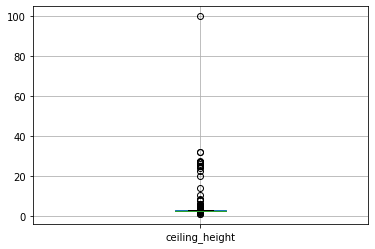

In [85]:
#построим диаграмму размаха
df.loc[:,['ceiling_height']].boxplot() 

Также значения выше 20 м кажутся недостоверными, и можно предположить, что это просто ошибка ввода в виде пропущенной запятой.

In [86]:
#Исправим данные:
df['ceiling_height'] = (df['ceiling_height']
                        .loc[df['ceiling_height']!=100]
                        .where(df['ceiling_height'] <= 20, (df['ceiling_height'] / 10)))

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

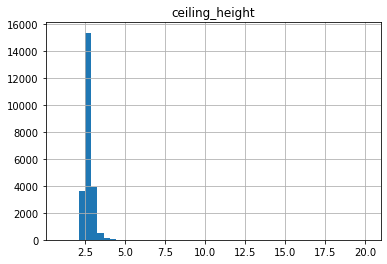

In [87]:
df.loc[:,['ceiling_height']].hist(bins=50)

Далее анализ столбцов, содержащих количественные значения, будет выполнен следующим образом:

- Общая оценка: посмотрим на диапазон вариации, средние и медианные значения, разброс значений и границы квартилей;
- Визуальня оценка через построение гистограмм;
- Определене статистических выбросов по границам квартилей;
- Корректировка значений через удаление выбросов, в случаях, когда это будет допустимо (удаленные данные будут составлять небольшой процент датасета).

##### Столбец `total_area` (общая площадь квартиры)

In [88]:
df['total_area'].describe()

count    23590.000000
mean        60.337013
std         35.653587
min         12.000000
25%         40.000000
50%         52.000000
75%         69.747500
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

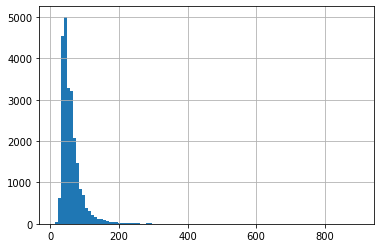

In [89]:
df['total_area'].hist(bins=100)

In [90]:
str_count = len(df['total_area'][df['total_area']>350])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 41


Удаление 41 строки не повляет на результаты выводов

In [91]:
df = df[df['total_area'] < 350]

In [92]:
df['total_area'].describe()

count    23549.000000
mean        59.656914
std         31.437769
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        347.500000
Name: total_area, dtype: float64

##### Столбец `living_area` (жилая площадь квартиры)

In [93]:
df['living_area'].describe()

count    23549.000000
mean        34.256048
std         20.326603
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        260.000000
Name: living_area, dtype: float64

<AxesSubplot:>

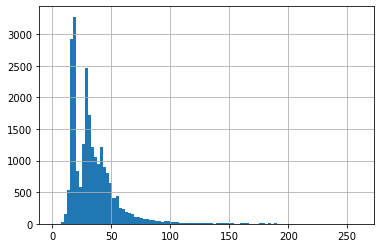

In [94]:
df['living_area'].hist(bins=100)

In [95]:
str_count = len(df['living_area'][df['living_area']>200])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 8


Удаление 8 строк допустимо.

In [96]:
df = df[df['total_area'] < 200]

##### Столбец `kitchen_area` (площадь кухни)

In [97]:
df['kitchen_area'].describe()

count    23360.000000
mean        10.277066
std          5.324926
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.200000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

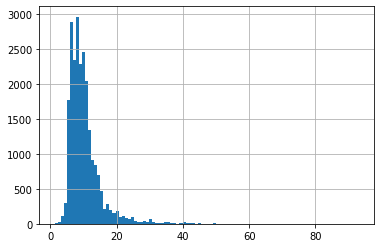

In [98]:
df['kitchen_area'].hist(bins=100)

In [99]:
str_count = len(df['kitchen_area'][df['kitchen_area']>50])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 27


Удаление 27 строк допустимо.

In [100]:
df = df[df['kitchen_area'] < 50]

##### Столбец `rooms` (количество комнат)

In [101]:
df['rooms'].describe()

count    23326.000000
mean         2.033611
std          0.994985
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

<AxesSubplot:>

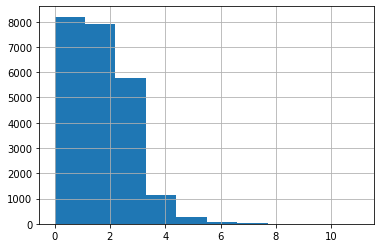

In [102]:
df['rooms'].hist(bins=10)

In [103]:
str_count = len(df['rooms'][df['rooms']>7])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 4


Удаление 4 строк допустимо.

In [104]:
df = df[df['rooms'] < 7]

##### Столбец `balcony` (количество балконов)

In [105]:
df['balcony'].describe()

count    23302.000000
mean         0.595786
std          0.961374
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

<AxesSubplot:>

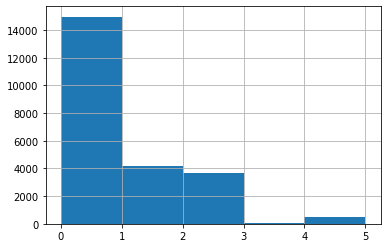

In [106]:
df['balcony'].hist(bins=5)

In [107]:
str_count = len(df['balcony'][df['balcony']>4])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 301


Объявления о продаже с количеством балконов больше трех составляет менее 5% от общего количества строк датасета, однако эта информация не настолько существенна для нашего анализа, оставим эти данные.

##### Столбец `floor` (этаж квартиры)

In [108]:
df['floor'].describe()

count    23302.000000
mean         5.888465
std          4.881652
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:>

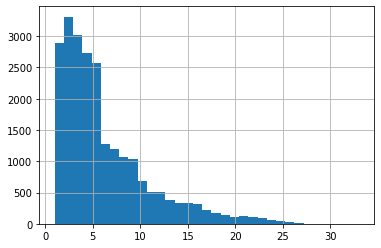

In [109]:
df['floor'].hist(bins=33)

In [110]:
str_count = len(df['floor'][df['floor']>30])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 3


Удаление 3 строк допустимо.

In [111]:
df = df[df['rooms'] < 30]

##### Столбец `floors_total` (общее количество этажей в доме)

In [112]:
df['floors_total'].describe()

count    23302.000000
mean        10.720625
std          6.605264
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

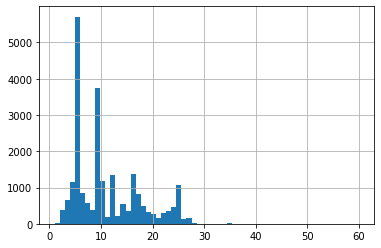

In [113]:
df['floors_total'].hist(bins=60)

In [114]:
str_count = len(df['floors_total'][df['floors_total']>30])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 32


Удаление 32 строк допустимо.

In [115]:
df = df[df['floors_total'] < 30]

##### Столбец `last_price` (цена объекта)

In [116]:
df['last_price'].describe()

count    2.327000e+04
mean     5.960300e+06
std      6.001470e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      3.300000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

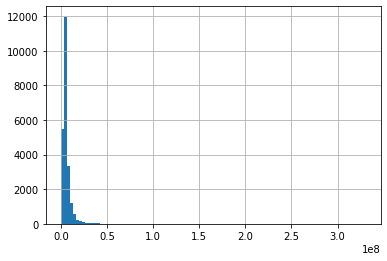

In [117]:
df['last_price'].hist(bins=100)

Стоимость квартиры зависит как от объективных ее характеристик, так и субъективных. 
В данном случае небольшое количество объявлений составляет "элитная" недвижимость, которая дороже 50 млн руб. Удалим такие строки чтобы иметь лучшую картину цен на недвижимость.

In [118]:
str_count = len(df['last_price'][df['last_price']>50000000])
print('Количество строк для удаления:', str_count)

Количество строк для удаления: 42


Удаление 42 строк допустимо.

In [119]:
df = df[df['floors_total'] < 50000000]

#### Общие результаты проведенной предобработки данных

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23270 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23270 non-null  int64         
 1   last_price                23270 non-null  float64       
 2   total_area                23270 non-null  float64       
 3   first_day_exposition      23270 non-null  datetime64[ns]
 4   rooms                     23270 non-null  int64         
 5   ceiling_height            23269 non-null  float64       
 6   floors_total              23270 non-null  int64         
 7   living_area               23270 non-null  float64       
 8   floor                     23270 non-null  int64         
 9   is_apartment              23270 non-null  bool          
 10  studio                    23270 non-null  bool          
 11  open_plan                 23270 non-null  bool          
 12  kitchen_area      

Изначально в датафрейме содержалось 23699 строки, после проведения предварительной обработки осталось 23270 строки. Потеря в данных составляет около 2%, что не является существенным. Избавившись от строк, мы повысили качество данных для анализа, избавились от статистических выбросов, аномалий и пропущенных значений.

In [121]:
#посмотрим на оставщиеся пропуски:
df.isna().sum()

total_images                    0
last_price                      0
total_area                      0
first_day_exposition            0
rooms                           0
ceiling_height                  1
floors_total                    0
living_area                     0
floor                           0
is_apartment                    0
studio                          0
open_plan                       0
kitchen_area                    0
balcony                         0
locality_name                   0
airports_nearest             5514
city_centers_nearest         5494
parks_around3000                0
parks_nearest               15423
ponds_around3000                0
ponds_nearest               14447
days_exposition              3094
centers_nearest_category     5494
dtype: int64

Остались незаполненными пропуски в столбцах airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest, ponds_nearest.
Также в указанных столбцах значения не могут быть изменены на int из-за значений NaN.

### Посчитаем и добавим в таблицу новые столбцы

#### Цена одного квадратного метра

In [122]:
#разделим стоимость объекта на его общую площадь и округлим до 2-х знаков после запятой
df['price_per_meter'] = (df['last_price']/df['total_area']).round(2)

In [123]:
df['price_per_meter']

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_per_meter, Length: 23270, dtype: float64

#### День недели публикации

In [124]:
df['weekday']=df['first_day_exposition'].dt.weekday

In [125]:
sorted(df['weekday'].unique())

[0, 1, 2, 3, 4, 5, 6]

#### Месяц публикации объявления

In [126]:
df['month']=df['first_day_exposition'].dt.month

In [127]:
sorted(df['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#### Год публикации объявления

In [128]:
df['year']=df['first_day_exposition'].dt.year

In [129]:
sorted(df['year'].unique())

[2014, 2015, 2016, 2017, 2018, 2019]

#### Тип этажа квартиры

In [130]:
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'
df.loc[df['floor_category'].isna(), 'floor_category'] = 'другой'

In [131]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,centers_nearest_category,price_per_meter,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,...,482.0,2,755.0,NaN,в пределах города,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.677288,11,18.600000,1,False,...,NaN,0,NaN,81.0,область,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.672838,5,34.300000,4,False,...,90.0,2,574.0,558.0,в пределах города,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,3.064470,14,91.730769,9,False,...,84.0,3,234.0,424.0,центр,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,...,112.0,1,48.0,121.0,центр,100000.00,1,6,2018,другой


#### Расстояние до центра города в километрах

In [132]:
#переведем значение в км и округлим до ближайщих целых значений
df['city_centers_nearest_km']=(df['city_centers_nearest']/1000).round()

In [133]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,centers_nearest_category,price_per_meter,weekday,month,year,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.000000,8,False,...,2,755.0,NaN,в пределах города,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.677288,11,18.600000,1,False,...,0,NaN,81.0,область,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.672838,5,34.300000,4,False,...,2,574.0,558.0,в пределах города,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,3.064470,14,91.730769,9,False,...,3,234.0,424.0,центр,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.000000,13,False,...,1,48.0,121.0,центр,100000.00,1,6,2018,другой,8.0


### Исследовательский анализ данных

Оценим как изменились данные после предобработки (количество пропусков, тип данных, новые столбцы)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23270 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23270 non-null  int64         
 1   last_price                23270 non-null  float64       
 2   total_area                23270 non-null  float64       
 3   first_day_exposition      23270 non-null  datetime64[ns]
 4   rooms                     23270 non-null  int64         
 5   ceiling_height            23269 non-null  float64       
 6   floors_total              23270 non-null  int64         
 7   living_area               23270 non-null  float64       
 8   floor                     23270 non-null  int64         
 9   is_apartment              23270 non-null  bool          
 10  studio                    23270 non-null  bool          
 11  open_plan                 23270 non-null  bool          
 12  kitchen_area      

##### Столбец 'price_per_meter' (цена за кв. метр)

count    2.327000e+04
mean     9.813936e+04
std      4.482125e+04
min      1.118300e+02
25%      7.638889e+04
50%      9.475635e+04
75%      1.137500e+05
max      1.736842e+06
Name: price_per_meter, dtype: float64


<AxesSubplot:>

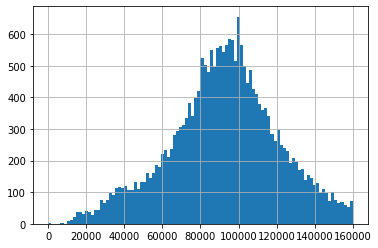

In [135]:
print(df['price_per_meter'].describe())
df['price_per_meter'].hist(bins=100, range = (0, 160000))

Средняя цена объекта недвижимости находится в диапазоне от 65000 до 110000 тыс.руб

##### Столбец 'total_area' (общая площадь)

count    23270.000000
mean        57.915056
std         26.070920
min         12.000000
25%         40.000000
50%         51.600000
75%         68.400000
max        199.200000
Name: total_area, dtype: float64


<AxesSubplot:>

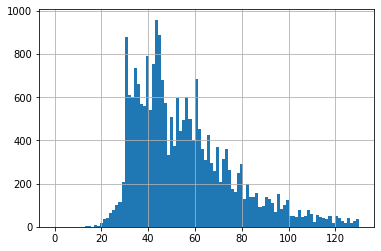

In [136]:
print(df['total_area'].describe())
df['total_area'].hist(bins=100, range = (0, 130))

Большинство представленных на рынке недвижимости квартир имеют площадь в пределах от 30 до 50 кв.м.

##### Столбец 'living_area' (жилая площадь)

count    23270.000000
mean        33.222728
std         17.080222
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64


<AxesSubplot:>

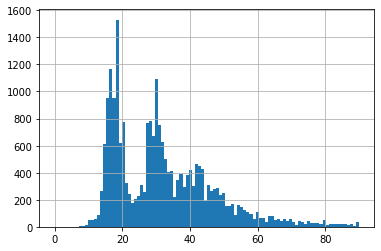

In [137]:
print(df['living_area'].describe())
df['living_area'].hist(bins=100, range = (0, 90))

Жилая площадь квартир в среднем составляет 30 кв.м Но также в Санкт-Петербурге популярны квартиры-студии, что объясняет много высоких значения в 15-20 кв. м.

##### Столбец 'kitchen_area' (площадь кухни)

count    23270.000000
mean        10.193421
std          4.942536
min          1.300000
25%          7.000000
50%          9.000000
75%         11.725000
max         49.400000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

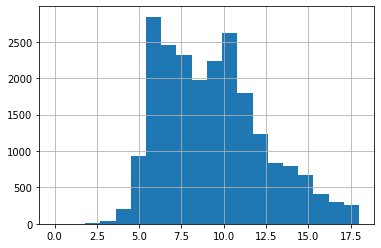

In [138]:
print(df['kitchen_area'].describe())
df['kitchen_area'].hist(bins=20, range = (0, 18))

В среднем площадь кухни составляет от 6 до 9 кв.м. 

##### Столбец 'rooms' (количество комнат)

count    23270.000000
mean         2.028449
std          0.979904
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


<AxesSubplot:>

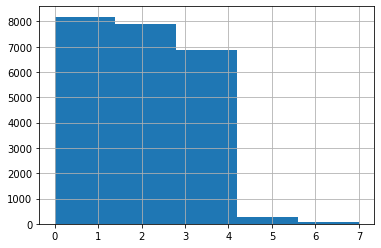

In [139]:
print(df['rooms'].describe())
df['rooms'].hist(bins=5, range = (0, 7))

Большая часть квартир имеет 1,2,3 реже 4 комнаты. Такие планировки пользуются спросом.

##### Столбец 'ceiling_height' (высота потолков)

count    23269.000000
mean         2.731480
std          0.279057
min          1.000000
25%          2.600000
50%          2.672838
75%          2.750000
max         20.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:>

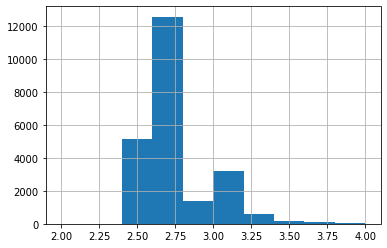

In [140]:
print(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=10, range = (2, 4))

Подавляющее большинство квартир имеет высоту потолков 2,5 -2,6 м. Но и потолки высотой 2,7 - 2,8 м также встречаются довольно часто. Обратим внимание еще и на особенность Санкт-Петербурга - в городе есть много старой застройки с потолками выше 3 м.

##### Столбец 'floors_total'  (всего этажей в доме)

count    23270.000000
mean        10.685346
std          6.538041
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64


<AxesSubplot:>

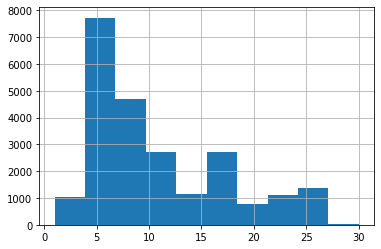

In [141]:
print(df['floors_total'].describe())
df['floors_total'].hist(bins=10, range = (1, 30))

На рынке недвижимости преобладают постройки домов в 5 и 9 этажей.

##### Столбец 'floor' (этаж)

count    23270.000000
mean         5.872626
std          4.853142
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64


<AxesSubplot:>

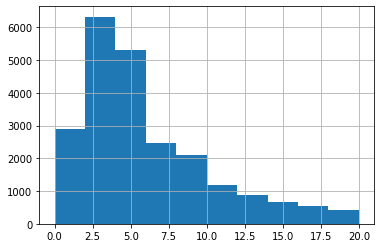

In [142]:
print(df['floor'].describe())
df['floor'].hist(bins=10, range = (0, 20))

Содержание столбцов 'floors_total' и 'floor' коррелирует между собой, постороим для еще большей наглядности график со значением "hexbin"

<AxesSubplot:xlabel='floors_total', ylabel='floor'>

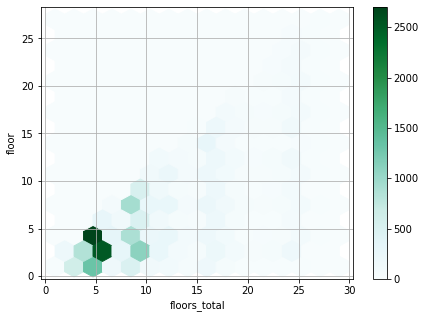

In [143]:
df.plot(x='floors_total', y='floor', kind='hexbin', gridsize=15, figsize=(7, 5), sharex=False, grid=True) 

Большинство квартир, выставленных на продажу, находятся на 3-5 этажах.

<AxesSubplot:>

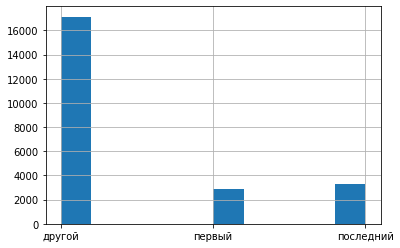

In [144]:
df['floor_category'].hist(bins=10)

##### Столбец 'city_centers_nearest' (расстояние до центра города в метрах)

count    17776.000000
mean     14281.500563
std       8593.296595
min        181.000000
25%       9436.000000
50%      13149.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


<AxesSubplot:>

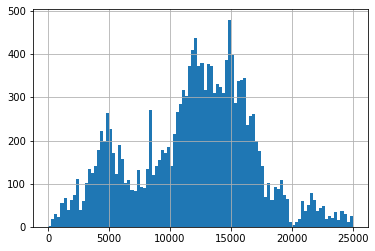

In [145]:
print(df['city_centers_nearest'].describe())
df['city_centers_nearest'].hist(bins=100, range = (0, 25000))

Большинство представленных квартир находятся на расстоянии 13-15 км до центра.

##### Столбец 'parks_nearest' (расстояние до парка)

count    7847.000000
mean      492.104753
std       342.660178
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64


<AxesSubplot:>

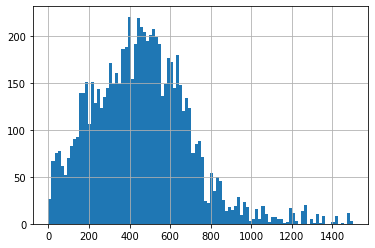

In [146]:
print(df['parks_nearest'].describe())
df['parks_nearest'].hist(bins=100, range = (0, 1500))

Среднее расстояние до парков 350-550 м, можно объяснить это тем, что в Санкт-Петербурге в целом много парков.

##### Столбец 'airports_nearest' (расстояние до аэропорта)

count    17756.000000
mean     28841.112582
std      12688.214475
min          0.000000
25%      18488.000000
50%      26880.500000
75%      37374.250000
max      84869.000000
Name: airports_nearest, dtype: float64


<AxesSubplot:>

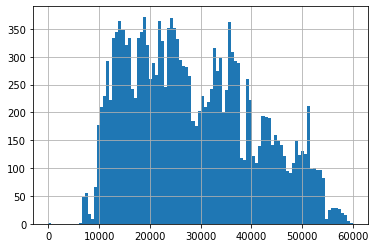

In [147]:
print(df['airports_nearest'].describe())
df['airports_nearest'].hist(bins=100, range = (0, 60000))

Среднее расстояние до аэропорта в среднем составляет 18-30 км.

### Длительность продажи квартир

count    20176.000000
mean       179.543071
std        218.297127
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:>

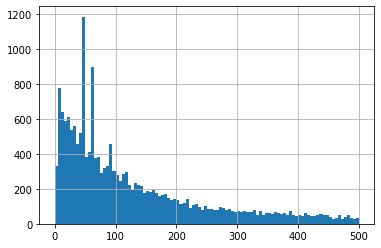

In [148]:
print(df['days_exposition'].describe())
df['days_exposition'].hist(bins=100, range = (0, 500))

Построим диаграмму размаха чтобы посмотреть на нормальные значения и увидеть выбросы

<AxesSubplot:>

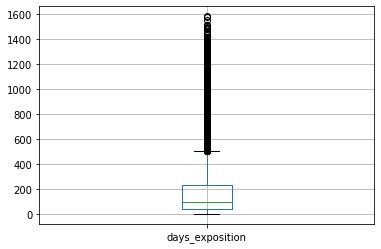

In [149]:
df.loc[:,['days_exposition']].boxplot() 

На диаграмме "ящик с усами" мы видим выбросы, которые находятся за пределом в 500 дней. Объктивно продолжительность продажи в 500 дней слишком долгая, для корректных выводов о "нормальной" продолжительности продаж от таких значений лучше избавиться.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Да, свыше 1.5 лет можно назвать долгой продажей

In [150]:
#посчитаем количество строк с количеством дней больше 500
print(len(df.loc[df['days_exposition']>500]),' из ', len(df))

1693  из  23270


In [151]:
#удалим эти строки
df = df.loc[df['days_exposition']<500]

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

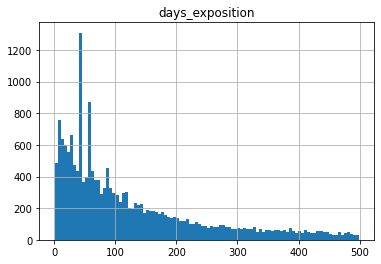

In [152]:
df.loc[:,['days_exposition']].hist(bins=100)

На гистограмме есть несколько пиковых значений, которые явно выбиваются из общей картины. Посмотрим какие сроки продажи составляют пиковые значения.

In [153]:
df['days_exposition'].value_counts().head(10)

45.0    878
60.0    538
7.0     231
30.0    207
90.0    190
4.0     174
3.0     156
5.0     150
14.0    143
9.0     140
Name: days_exposition, dtype: int64

Мы видим слишком "ровные" значения в 7, 14, 30, 45, 60 и 90 дней. Вряд ли квартиры продаются систематически ровно за неделю/месяц/полтора месяца/три месяца. Можно предположить, что большое количество таких значений связано с условиями размещения объявлений о продаже (например, объявления автоматически снимаются с публикции на определенный день), а не с действительными обстоятельствами продажи. Если это так, то уберем эти данные из нашего датасета.

In [154]:
df = df.query('days_exposition not in [7,14,30,45,60,90]')

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

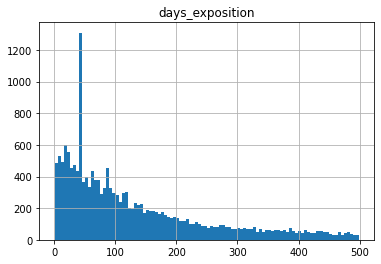

In [155]:
#Посмотрим теперь на гистограмму столбца 'days_exposition'
df.loc[:,['days_exposition']].hist(bins=100)

In [156]:
#выделим три равные категории относительно скорости продаж квартир:
pd.qcut(df['days_exposition'], 3)

1         (52.0, 147.0]
3        (147.0, 499.0]
4         (52.0, 147.0]
5         (52.0, 147.0]
6        (147.0, 499.0]
              ...      
23689     (0.999, 52.0]
23690     (0.999, 52.0]
23692    (147.0, 499.0]
23693    (147.0, 499.0]
23695     (0.999, 52.0]
Name: days_exposition, Length: 17360, dtype: category
Categories (3, interval[float64]): [(0.999, 52.0] < (52.0, 147.0] < (147.0, 499.0]]

Получилось 3 категории квартир, которые продаются:
 - меньше 52 дней
 - от 52 до 147 дней
 - от 147 до 499 дней

In [157]:
def days_exposition_type (days):
    if days <= 52:
        return 'быстрая продажа'
    elif 53 < days <= 147:
        return 'средняя продажа'
    else:
        return 'долгая продажа'

In [158]:
df['days_exposition_type']=df['days_exposition'].apply(days_exposition_type)

In [159]:
df.pivot_table(index='days_exposition_type', values='days_exposition', aggfunc='median')

,days_exposition
days_exposition_type,
быстрая продажа,28.0
долгая продажа,251.0
средняя продажа,91.0


Можно сделать вывод, что квартиры продаются по-разномую. Быстрые продажи - это продажи, которые происходят в течение двух месяцев. Обычная продолжительность продажи находится в диапазоне от двух до шести месяцев. От полугода до полутора лет - долгая продажа, но в пределах нормы. Однако не не редки случаи, когда объект недвижимости продается и более полутора лет. Такие случаи на рынке недвижимости встречаются на практике.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Тут согласен

### Стоимость квартиры

1. Какие факторы больше всего влияют на стоимость квартиры?

Как правило, влияние на стоимость квартиры оказывают такие факторы как ее местоположение (центр города/окранина, хороший район/ неблагополучный, близость метро/транспортных развязок), тип жилья (частный дом/квартира), наличие лифта, развитость инфраструктуры, расположение квартиры в доме, площадь и планировка квартиры, вид из окна и общее состояние квартиры (новая, с ремонтом, без ремонта).

Ниже проанализируем как зависит стоимость квартиры от площади (общей, жилой, нежилой) и количества комнат.

Для анализа влияния факторов на цену объекта недвижимости, построим матрицу диаграмм рассеяния чтобы визуально оценить наличие связи между ценой и каждым из этих факторов.

In [160]:
price_of_apartment = df.loc[:,['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
price_of_apartment.head()

,last_price,total_area,living_area,kitchen_area,rooms
1,3350000.0,40.4,18.600000,11.000,1
3,64900000.0,159.0,91.730769,27.825,3
4,10000000.0,100.0,32.000000,41.000,2
5,2890000.0,30.4,14.400000,9.100,1
6,3700000.0,37.3,10.600000,14.400,1


Посчитаем коэффициент корреляции Пирсона:

In [161]:
price_of_apartment.corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.654455,0.559090,0.504091,0.382885
total_area,0.654455,1.000000,0.927886,0.601135,0.787699
living_area,0.559090,0.927886,1.000000,0.379530,0.862702
kitchen_area,0.504091,0.601135,0.379530,1.000000,0.250359
rooms,0.382885,0.787699,0.862702,0.250359,1.000000


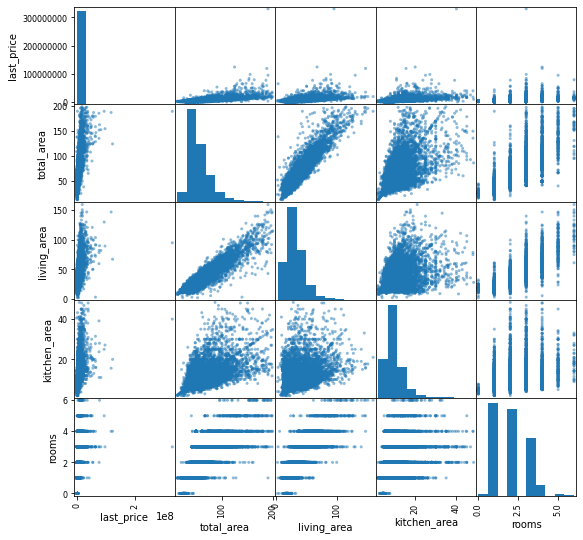

In [162]:
pd.plotting.scatter_matrix(price_of_apartment, figsize=(9, 9))
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

На такой визуализации практически ничего не видно. Давай каждый пункт рассмотрим раздельно

<div class="alert alert-info"> <b>Комментарии студента:</b> Добавила ниже </div> 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Зависимости дискретных данных (тип этажа, месяц, комнаты) лучше рассмотреть на линейной или столбчатой диаграмме (сгруппировав предварительно)
</div>

Рассмотрим поближе графики с зависимостью цены от площади (общей, жилой, кухни) и количества комнат.

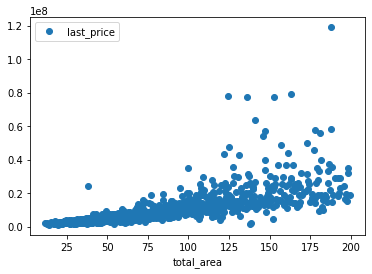

In [163]:
#зависимость цены квартиры от общей площади
pivot_table_total_area = df\
.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])\
.plot(y = 'median', style = 'o')

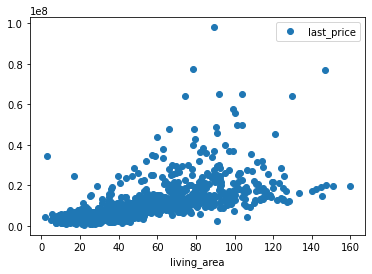

In [164]:
#зависимость цены квартиры от жилой площади
pivot_table_total_area = df\
.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])\
.plot(y = 'median', style = 'o')

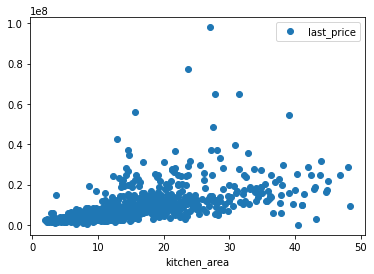

In [165]:
#зависимость цены квартиры от площади кухни
pivot_table_total_area = df\
.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])\
.plot(y = 'median', style = 'o')

Для количества комнат построим столбчатую диаграмму:

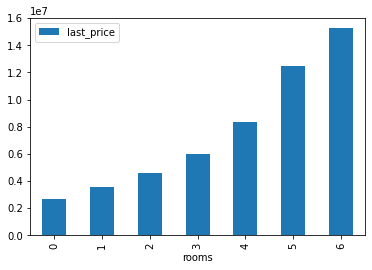

In [166]:
#зависимость цены квартиры от количества комнат
pivot_table_total_area = df\
.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])\
.plot(y = 'median', kind = 'bar')

**Вывод:** 

Общая площадь, а также жилая площадь и площадь кухни находятся в средней зависимости от цены, чем оказывают на нее существенное влияние. Высокая зависимость обнаруживается между общей и жилой площадью, что логично.

Цена имеет слабую зависимость от количества комнат (коэффициент Пирсона 0,4), что означает менее существенное влияние на формирование цены. Но тем не менее, чем больше количество комнат, тем выше цена.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

#### Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

count      2098.000000
mean      79850.699438
std       32238.982347
min        9615.380000
25%       60937.500000
50%       80000.000000
75%       96336.655000
max      387096.770000
Name: price_per_meter, dtype: float64


<AxesSubplot:>

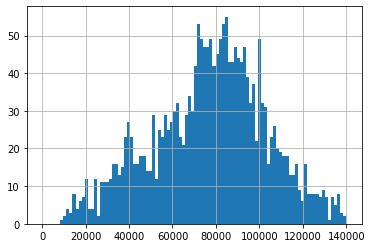

In [167]:
print(df[df['floor_category'] == 'первый']['price_per_meter'].describe())
df[df['floor_category'] == 'первый']['price_per_meter'].hist(bins=100, range = (0, 140000))

Больше всего квартир, находящихся на первом этаже, было продана за 70-85 тыс. за кв.м. Спад по продажам на такие квартиры мы наблюдаем после стоимости 110 тыс. за кв.м. В целом квартиры на первом этаже не пользуются высоким спросом.

count      2386.000000
mean      88222.570989
std       43305.142526
min         111.830000
25%       63654.690000
50%       86222.270000
75%      105107.232500
max      634328.360000
Name: price_per_meter, dtype: float64


<AxesSubplot:>

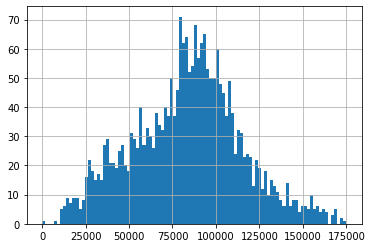

In [168]:
print(df[df['floor_category'] == 'последний']['price_per_meter'].describe())
df[df['floor_category'] == 'последний']['price_per_meter'].hist(bins=100, range = (0, 175000))

По графику видно, что квартиры на последнем этаже стоят дороже чем на первом, а большее число продаж находится в диапазоне от 75 до 110 тыс. за кв. м.


count    1.287600e+04
mean     1.001163e+05
std      4.171744e+04
min      1.036866e+04
25%      8.010263e+04
50%      9.647473e+04
75%      1.140794e+05
max      1.736842e+06
Name: price_per_meter, dtype: float64


<AxesSubplot:>

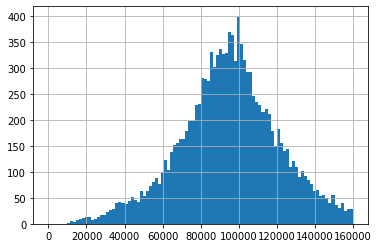

In [169]:
print(df[df['floor_category'] == 'другой']['price_per_meter'].describe())
df[df['floor_category'] == 'другой']['price_per_meter'].hist(bins=100, range = (0, 160000))

Квартиры на "других" этажах продаются в среднем от от 75 тыс. за кв.м. до 120 тыс. за кв.м. Это говорит о том, что другие этажи определенно стоят дороже, чем первые. При этом отличичие стоимости квартих на других этажах от квартир, находящихся на последних этажах небольшое.


<AxesSubplot:xlabel='floor_category'>

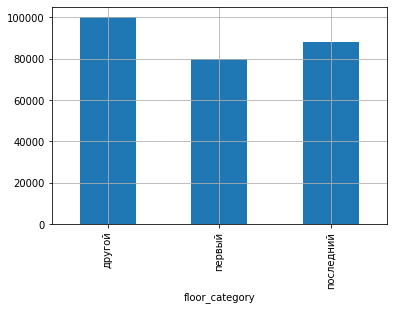

In [170]:
#сравним все виды этажей:
df.groupby('floor_category')['price_per_meter']\
.mean()\
.plot(y='price_per_meter', kind='bar', grid=True)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

**Вывод:** Квартиры на первом этаже стоят значительно дешевле, чем на более высоком. Объяснить это можно тем, что квартиры на первых этажах считаются менее ликвидными, из-за таких факторов как: слышимость прохожих с улицы, неприятные запахи из подвалов, вероятность воровства. Можно сказать, что при покупке квартиры на первом этаже можно сэкономить.

Квартиры выше первого считаются более ликвидными. На последнем этаже стоимость квартиры дороже, чем на первом, но дешевле чем на других.

#### Зависимость цены от даты размещения объявления: дня недели, месяца и года.

In [171]:
price_day_month_year = df.loc[:,['price_per_meter', 'weekday', 'month', 'year']]
price_day_month_year.head()

,price_per_meter,weekday,month,year
1,82920.79,1,12,2018
3,408176.10,4,7,2015
4,100000.00,1,6,2018
5,95065.79,0,9,2018
6,99195.71,3,11,2017


In [172]:
price_day_month_year.corr()

,price_per_meter,weekday,month,year
price_per_meter,1.000000,-0.003798,0.005767,0.030479
weekday,-0.003798,1.000000,0.012778,0.001366
month,0.005767,0.012778,1.000000,-0.216797
year,0.030479,0.001366,-0.216797,1.000000


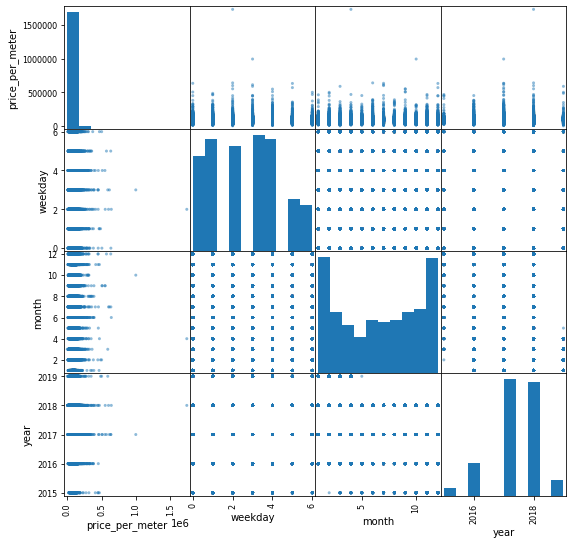

In [173]:
pd.plotting.scatter_matrix(price_day_month_year, figsize=(9, 9))
plt.show()

Матрица корреляции имеет очень слабые зависимости. Применение коэффициент корреляции Пирсона к таким параметрам как день недели, год, и месяц не совсем эффективно из-за того, что цена квартиры зависит от них не линейно.

Посмотрим как будут выглядеть медианы цен по дням/месяцам/годам на графике:

<AxesSubplot:title={'center':'Медиана цен по дню недели'}, xlabel='weekday'>

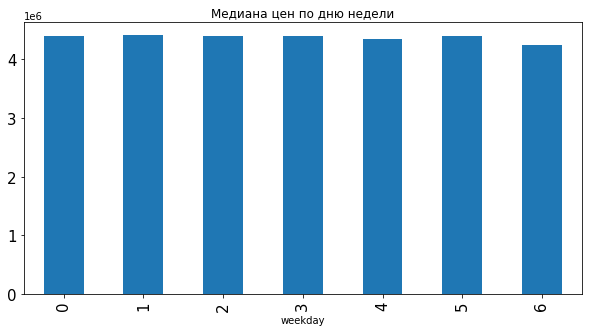

In [174]:
(
    df.groupby('weekday')
.median()['last_price']
.reset_index()
.sort_values(by='weekday')
.plot(x='weekday', 
      y='last_price', 
      kind='bar', 
      figsize=(10,5), 
      legend=False, 
      title='Медиана цен по дню недели', 
      fontsize=15)
)

<AxesSubplot:title={'center':'Медиана цен по месяцам'}, xlabel='month'>

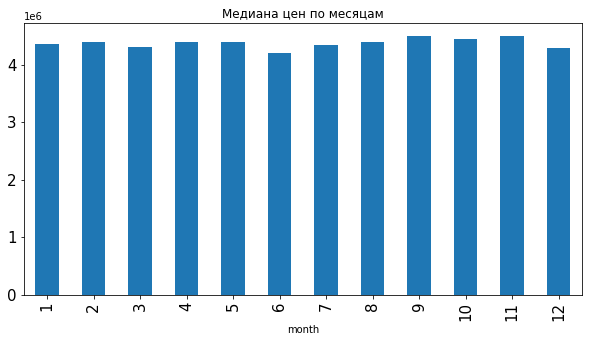

In [175]:
(
    df.groupby('month')
.median()['last_price']
.reset_index()
.sort_values(by='month')
.plot(x='month', 
      y='last_price', 
      kind='bar', 
      figsize=(10,5), 
      legend=False, 
      title='Медиана цен по месяцам', 
      fontsize=15)
)

<AxesSubplot:title={'center':'Медиана цен по году'}, xlabel='year'>

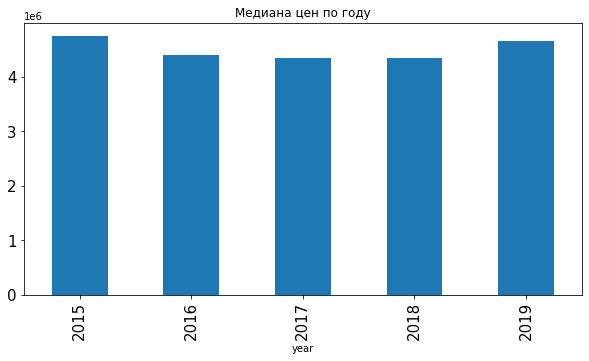

In [176]:
(
df.groupby('year')
.median()['last_price']
.reset_index()
.sort_values(by='year')
.plot(x='year', 
      y='last_price', 
      kind='bar', 
      figsize=(10,5), 
      legend=False, 
      title='Медиана цен по году', 
      fontsize=15)
)

**Вывод:**

- Зависимость цены от дня и месяца публикации объявления о продаже практически отсутствует. 
- Можно увидеть небольшую зависимомть цены от года публикации. Так средняя цена на недвижимость была ниже в 2016-2018 гг. А в 2019 г. цена стала опять расти. Действительно, период 2015-2018 гг. считается крзисным в экономике. В 2019 г. произошло оживление экономики и цены пошли вверх.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный инсайд для заказчика

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [177]:
#Сначала отберем 10 населенных пунктов с наибольшим числом объявлений, и запишем список в переменную top_10:
top_10 = df['locality_name'].value_counts().index[0:10]
top_10

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'поселок Шушары', 'Всеволожск',
       'Колпино', 'поселок Парголово', 'Пушкин', 'Гатчина', 'Выборг'],
      dtype='object')

Рассчитаем среднюю цену в каждом из населенных пунктов списка из Топ-10:

In [178]:
top_10_pivot_table_mean = (df
                           .query('locality_name in @top_10')
                           .pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean')
                           .sort_values(by='price_per_meter',ascending=False))
top_10_pivot_table_mean

,price_per_meter
locality_name,
Санкт-Петербург,110378.677142
Пушкин,101853.392171
Кудрово,94353.806064
поселок Парголово,89260.676180
Мурино,85786.779630
поселок Шушары,77719.999356
Колпино,74540.847446
Всеволожск,68557.359830
Гатчина,67792.629313


Определим самую высокую и самую низкую цену квадратного метра, усредненную по каждому населенному пункту:

In [179]:
top_10_pivot_table_min_max = (df
                              .query('locality_name in @top_10')
                              .pivot_table(index='locality_name', values='price_per_meter', aggfunc=['min','max']))
top_10_pivot_table_min_max

,min,max
,price_per_meter,price_per_meter
locality_name,,
Всеволожск,31400.00,640422.35
Выборг,18750.00,93181.82
Гатчина,10507.25,105818.18
Колпино,47957.37,125000.00
Кудрово,54160.35,142857.14
Мурино,50000.00,138580.25
Пушкин,59836.07,256521.74
Санкт-Петербург,111.83,1736842.11


Как видно из полученной информации, самая высокая цена за квадратный метр в г. Санкт-Петербург. Самые низкие в области.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Смотри, как можно в 1 строку:

In [183]:
df.groupby('locality_name')[]\
.agg({'balcony':'count', 'last_price':'median'}) \
.sort_values(by = 'balcony', ascending = False) \
.head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,11356,5180000.0
Мурино,487,3350000.0
Кудрово,376,3800000.0
поселок Шушары,357,3900000.0
Всеволожск,294,3315000.0
Колпино,278,3540000.0
поселок Парголово,267,4000000.0
Пушкин,258,4990000.0
Гатчина,233,3000000.0


Построим столбчатую диграмму со значением средней цены за кв. м. для каждого километра:

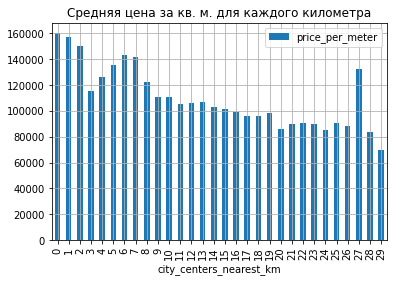

In [207]:
SPb = (df[df['locality_name'] == 'Санкт-Петербург']
       .pivot_table(index='city_centers_nearest_km', values='price_per_meter', aggfunc='mean'))
#SPb
SPb['city_centers_nearest_km']=SPb.index.astype('int')
SPb.plot(x='city_centers_nearest_km', y='price_per_meter', kind='bar', grid=True, title = 'Средняя цена за кв. м. для каждого километра');

In [208]:
SPb.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30 entries, 0.0 to 29.0
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price_per_meter          30 non-null     float64
 1   city_centers_nearest_km  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 720.0 bytes


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличная визуализация. В твой код добавил заголовок, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Исправлено! </div>

In [210]:
print(SPb['city_centers_nearest_km'].corr(SPb['price_per_meter']))

-0.8242649917698642


Как мы видим на графике, цена после 8 км идет на снижение, можно сделать вывод, что это и есть центр города. Также мы видим резкий всплеск цены на 27 километре, возможно он связан с небольшим количеством наблюдений.

По мере удаления от центра города цена квадратного метра недвижимости падает довольно значительно. Эта тенденция особенно заметна и рядом с центром, и сохраняется по мере удаления от него.

В целом на графике можно проследить очевидную зависимость цены кв. метра от расстояния до центра города, коэфициент Пирсона также подтверждает эту зависимость.

### Общий вывод

**Мы проанализировали рынок недвижимости Санкт-Петербурга, провели предобработку данных и обширный исследовательский анализ, в результате чего:**

- В данных были найдены пропуски, неявные дубликаты, аномальные значения;
- Пропуски, были заполнены, там где это возможно, неявные дубликаты, а также редкие и выбивающиеся значения устранены, кроме того данные в таблице были приведены к нужным типам;
- Для более качественого анализа таблица была дополнена новыми столбцами: "цена за кв.м.", "день недели, месяц и год публикации объявления", "этажность квартир", "расстояние до центра";
- Были изучены все параметры объектов нежвижимости, после чего сделаны выводы, построены графики;
- Были проанализированы факторы, влияющие на стоимость квартиры (зависитимость цены от квадратного метра, числа комнат, этажности, удалённости от центра и др.);
- Выделены населённые пункты с самой высокой и низкой стоимостью жилья, определена средняя цена кв. м. для каждого километра.

**Из полученных данных были выявлены следующие наблюдения:**

- Цена на квартиру очень сильно зависит от ее общей площади (чем больше площадь, тем выше цена). Так, большинство представленных на рынке недвижимости квартир имеют площадь в пределах от 30 до 50 кв.м. Из них жилая площадь квартир в среднем составляет 30 кв.м, а площадь кухни составляет от 6 до 9 кв.м.;

- Также на стоимость жилья влияет и количество комнат в квартире, большая часть квартир имеет 1,2,3 реже 4 комнаты;

- Средняя цена объекта недвижимости находится в диапазоне от 65000 до 110000 тыс.руб.;

- Этаж, на котором находится квартира, также влияет на ее стоимость. Квартиры на первом этаже стоят значительно дешевле (в среднем 70-85 тыс. за кв.м.), чем на более высоком этаже (от 75 до 110 тыс. за кв.м.). Квартиры на первых этажах считаются менее ликвидными, из-за таких факторов как: слышимость прохожих с улицы, неприятные запахи из подвалов, вероятность воровства. Квартиры выше первого считаются более ликвидными. Также добавим, что на рынке недвижимости преобладают постройки домов в 5 и 9 этажей, а больше всего квартир продаются на 3-5 этажах;

- Влияние на цену оказывает и удаленность от центра - чем дальше от центра, тем ниже цена. Таким же образом небольшое влияние оказывает удаленность от аэропорта. Большинство представленных в объявлениях квартир находятся на расстоянии 13-15 км до центра, и на среднем расстоянии 18-30 км до аэропорта;

- Небольшое влияние оказывает присутствие парков/водоемов рядом. Среднее расстояние до парков 450-550 м., это можно объяснить тем, что в Санкт-Петербурге в целом много парков;

- Подавляющее большинство квартир имеет высоту потолков 2,5 -2,6 м. Но и потолки высотой 2,7 - 2,8 м также встречаются довольно часто. Обратим внимание еще и на особенность Санкт-Петербурга - в городе есть много старой застройки с потолками выше 3 м.;

- Самаые высокие цены за квадратный метр в г. Санкт-Петербург, после 8 км от центра цена идет на снижение.

- Обычная продолжительность продажи квартиры находится в диапазоне от двух до шести месяцев;

- Зависимость цены от дня и месяца публикации объявления о продаже практически отсутствует, но можно увидеть небольшую зависимомть цены от года публикации. Так средняя цена на недвижимость была ниже в 2016-2018 гг. А в 2019 г. цена стала опять расти.


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Вывод дополнила) </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Спасило за правки

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Замена пропусков

2) Построить графики scatter раздельно


----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод